In [3]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use( 'ggplot' )
sns.set(color_codes=True)

# Configure visualizations
%matplotlib inline

In [4]:
titanic_df = pd.read_csv('titanic_data.csv', index_col=0)

In [5]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.tail() 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
titanic_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
titanic_df.describe() 

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic_df.drop('Name', axis=1, inplace=True)
titanic_df.drop('Ticket',axis=1, inplace=True)
titanic_df.drop('Cabin', axis=1, inplace=True)
# Get the first 5 rows of the dataset to inspect
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [16]:
# Create new dataframe from titanic_df
titanic_fam_df = titanic_df.copy()
# Calculate the family size
family_size = titanic_df['SibSp'] + titanic_df['Parch'] + 1 
titanic_fam_df['Family'] = family_size
# Get the first 5 rows of the dataset to inspect

titanic_fam_df.drop('SibSp', axis=1, inplace=True)
titanic_fam_df.drop('Parch',axis=1, inplace=True)
titanic_fam_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,2
2,1,1,female,38.0,71.2833,C,2
3,1,3,female,26.0,7.9250,S,1
4,1,1,female,35.0,53.1000,S,2
5,0,3,male,35.0,8.0500,S,1


In [17]:
titanic_df.describe(include=[np.object])

C:\Users\ailaty\AppData\Local\Temp\ipykernel_60560\1429244643.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  titanic_df.describe(include=[np.object])


,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [18]:
grouped_Pclass_Srvl = titanic_fam_df.groupby('Pclass', as_index=False)['Survived'].mean().sort_values(by=['Survived'], ascending=False)
grouped_Pclass_Srvl.head()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival rate vs. Passenger class')

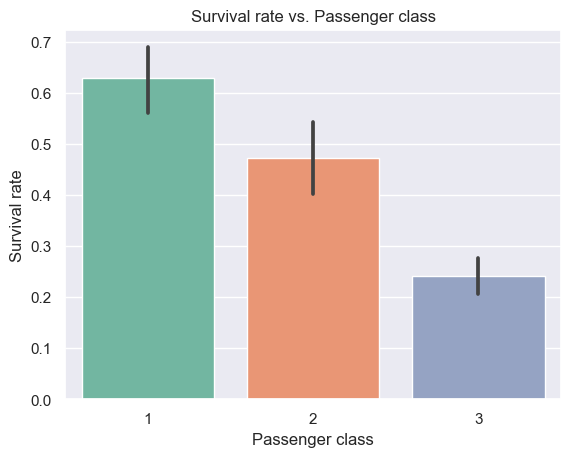

In [19]:
g = sns.barplot(x='Pclass', y='Survived', data=titanic_fam_df, palette="Set2")
# Fix axis label and title
g.set(xlabel='Passenger class', ylabel='Survival rate')
plt.title('Survival rate vs. Passenger class')

In [20]:
grouped_Pclass_Sex = titanic_fam_df.groupby(['Pclass','Sex'], as_index=False)['Sex'].size()

print(grouped_Pclass_Sex)

def sex_ratio(df, pclass):   
    number_of_male = df.groupby(['Pclass', 'Sex'], as_index=False).size()[pclass, 'male'].astype('float')
    number_of_female = df.groupby(['Pclass', 'Sex'], as_index=False).size()[pclass, 'female'].astype('float')
    ratio = (number_of_male / number_of_female).round(2)
    
    return ratio

print('-----------------------------')
print('Sex ratio in Class 1 is: {}'.format(sex_ratio(titanic_fam_df, 1)))
print('Sex ratio in Class 2 is: {}'.format(sex_ratio(titanic_fam_df, 2)))
print('Sex ratio in Class 3 is: {}'.format(sex_ratio(titanic_fam_df, 3)))

   Pclass     Sex  size
0       1  female    94
1       1    male   122
2       2  female    76
3       2    male   108
4       3  female   144
5       3    male   347
-----------------------------


KeyError: (1, 'male')

In [21]:
grouped_Pclass_Age = titanic_fam_df.groupby(['Pclass','Sex'], as_index=False)['Age'].mean().sort_values(by='Age', ascending=False)

grouped_Pclass_Age

,Pclass,Sex,Age
1,1,male,41.281386
0,1,female,34.611765
3,2,male,30.740707
2,2,female,28.722973
5,3,male,26.507589
4,3,female,21.750000


Text(0.5, 1.0, 'Age distribution in each passenger class')

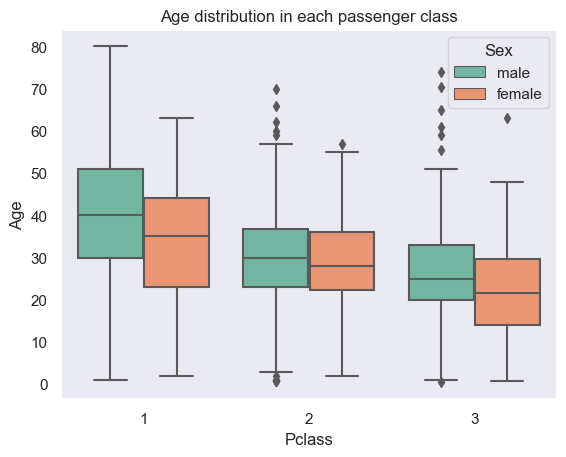

In [29]:
sns.set_style("dark")
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic_fam_df, palette='Set2')
plt.title('Age distribution in each passenger class')

In [30]:
# Create a swarm plot that shows distribution of passengers by age and sex in each class
g = sns.factorplot(kind='swarm', x='Sex', y='Age', col='Pclass', data=titanic_fam_df, palette='Set2')

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Age and Sex distrubution in each passenger class') 

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [ ]:
grouped_Pclass_Family = titanic_fam_df.groupby(['Pclass'], as_index=False)['Family'].mean().sort_values(by='Family', ascending=False)
grouped_Pclass_Family

,Pclass,Family
2,3,2.008147
1,2,1.782609
0,1,1.773148


In [ ]:
# Create a set of histograms that show the distribution of family sizes in each class
sns.set_style("dark")
g = sns.factorplot(x='Family', col='Pclass', data=titanic_fam_df, kind='count', palette='Set2', size=4, alpha=.8, aspect=.95)
g.set(xlabel='Family Size')

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Family size vs. Passenger class')

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [31]:
# Group data by Pclass and Sex and return average survival rate for each group
grouped_Pclass_Sex_srvl = titanic_fam_df.groupby(['Pclass','Sex'], as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)

grouped_Pclass_Sex_srvl

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


In [34]:
# Create a copy dataframe from titanic_fam_df
titanic_fam_age_df = titanic_fam_df.copy()

# Drop null values from age column
titanic_fam_age_df.dropna(axis=0, inplace=True)

titanic_fam_age_df.describe()
#titanic_fam_age_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,2
2,1,1,female,38.0,71.2833,C,2
3,1,3,female,26.0,7.9250,S,1
4,1,1,female,35.0,53.1000,S,2
5,0,3,male,35.0,8.0500,S,1
7,0,1,male,54.0,51.8625,S,1
8,0,3,male,2.0,21.0750,S,5
9,1,3,female,27.0,11.1333,S,3
10,1,2,female,14.0,30.0708,C,2


In [ ]:
# Create age bins
age_bins = [0, 11, 17, 25, 65, 80]

# Divide passengers into 5 different groups
group_names = ['Child', 'Youth', 'Young Adult', 'Adult', 'Senior']

# Cut dataframs based on age bins and lebels
titanic_fam_age_df['Age_group'] = pd.cut(titanic_fam_age_df['Age'], age_bins, labels=group_names)

# Get the first 5 rows of the new dataset to inspect
titanic_fam_age_df.head()

In [ ]:
# Frequency count for different groups
pd.value_counts(titanic_fam_age_df['Age_group'])

In [ ]:
# Group data by Pclass and Age Group and return average survival rate for each group
grouped_Pclass_AgeGroup_srvl = titanic_fam_age_df.groupby(['Pclass','Age_group'], as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)

grouped_Pclass_AgeGroup_srvl

In [ ]:
# Create a set of histograms that show the survival rate of different age groups in each class
g = sns.factorplot(data=titanic_fam_age_df, x='Age_group', y='Survived', col='Pclass', kind='bar', palette="Set2", alpha=.8)
g.set(xlabel='Age group', ylabel='Survival rate')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survival rate vs Age group in each passenger class')

In [35]:
# Find the youngest survived passenger 
youngest_to_survive = titanic_fam_age_df[titanic_fam_age_df['Survived'] == 1]['Age'].min()

# Find the oldest survived passenger
oldest_to_survive = titanic_fam_age_df[titanic_fam_age_df['Survived'] == 1]['Age'].max()

# Find the mean age of survived passenger

mean_age_survive = titanic_fam_age_df[titanic_fam_age_df['Survived'] == 1]['Age'].mean()

# Find the mean age of non-survived passenger
mean_age_not_survive = titanic_fam_age_df[titanic_fam_age_df['Survived'] == 0]['Age'].mean()

print('-----------------------------------------------')
print('Age of the youngest survived passenger is: {}'.format(youngest_to_survive))
print('Age of the oldest survived passenger is: {}'.format(oldest_to_survive))
print('The average age of survived passenger is: {}'.format(mean_age_survive))
print('The average age of non-survived passenger is: {}'.format(mean_age_not_survive))

-----------------------------------------------
Age of the youngest survived passenger is: 0.42
Age of the oldest survived passenger is: 80.0
The average age of survived passenger is: 28.19329861111111
The average age of non-survived passenger is: 30.62617924528302


c:\Users\ailaty\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.items()]
c:\Users\ailaty\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\ailaty\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.items()]
c:\Users\ailaty\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seabo

Text(0.5, 0.98, 'Survival rate by Sex and Age in each passenger class')

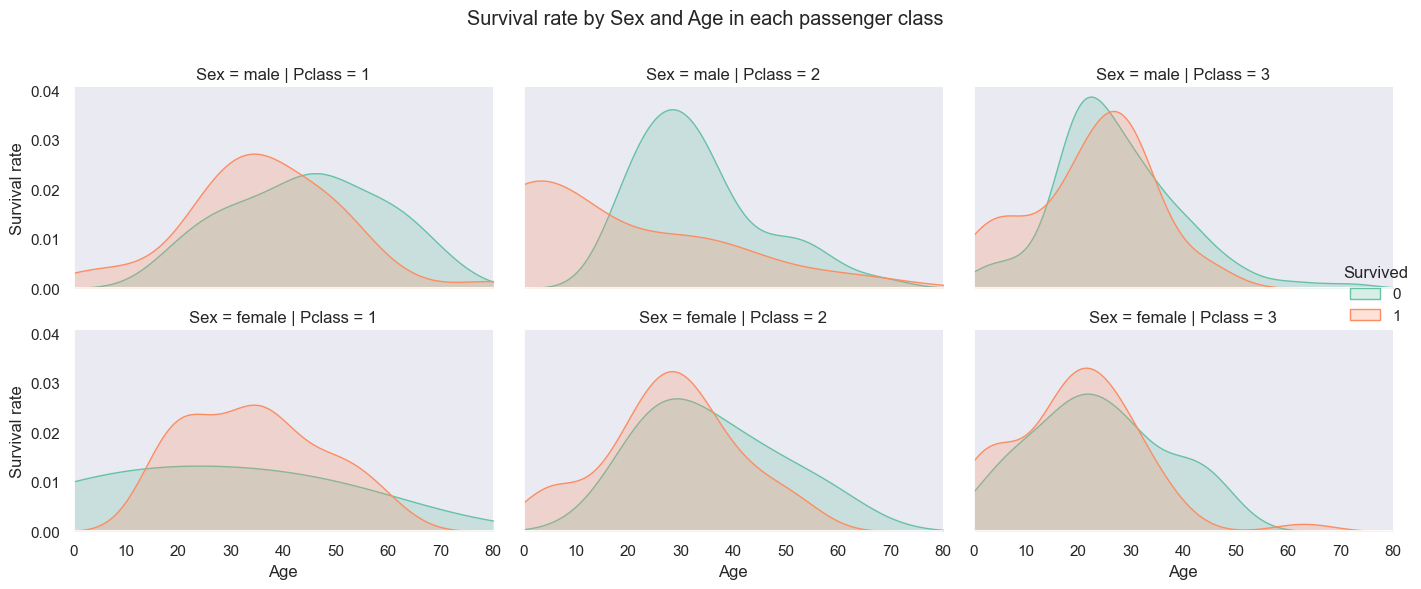

In [36]:
# Plot distributions of Age of passangers who survived or did not survive
g = sns.FacetGrid(titanic_fam_age_df, hue='Survived', row='Sex', col = 'Pclass', aspect=1.5, palette='Set2')
g.map(sns.kdeplot, 'Age', shade= True)

# Fix axis, labels and layout
g.set(xlim=(0, titanic_fam_age_df['Age'].max()))
g.set(ylabel='Survival rate')
g.add_legend()
plt.tight_layout()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survival rate by Sex and Age in each passenger class')

In [ ]:
grouped_Pclass_Family_count = titanic_fam_age_df.groupby(['Pclass','Family'], as_index=False).size()
grouped_Pclass_Family_count

In [ ]:
grouped_Pclass_Family_srvl = titanic_fam_age_df.groupby(['Pclass','Family'], as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)
grouped_Pclass_Family_srvl

In [ ]:
# Create a set of histograms that show the distribution of family sizes in each class
g = sns.factorplot(data=titanic_fam_age_df, x='Family', y='Survived', col='Pclass', kind='bar', palette="Set2", alpha=.8)
g.set(xlabel='Family Size', ylabel='Survival rate')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survival rate vs Family size in each passenger class')